In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Cleaned data.csv')

In [13]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg,company_txt,State,same_state,age,Python,aws,Excel,Spark,R
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,0,1,1,0
3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,0,1,0,0


In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'avg', 'company_txt',
       'State', 'same_state', 'age', 'Python', 'aws', 'Excel', 'Spark', 'R'],
      dtype='object')

In [15]:
#to get unique form of data
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [16]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [17]:
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts()

na        520
senior    220
jr          2
Name: Seniority, dtype: int64

In [20]:
#df.State = df.State.apply(lambda x: x.replace('Los Angeles', 'CA')
df['State'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 WI              10
 UT              10
 IN              10
 MO               9
 AZ               9
 AL               8
 MI               6
 DE               6
 GA               6
 KY               6
 IA               5
 CT               5
 NE               4
 LA               4
 OR               4
 KS               3
 NM               3
 MN               2
 ID               2
 RI               1
 SC               1
 Los Angeles      1
Name: State, dtype: int64

In [23]:
df['descr_len'] = df['Job Description'].apply(lambda x: len(x))
df['descr_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: descr_len, Length: 742, dtype: int64

In [24]:
df['competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['competitors_count']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: competitors_count, Length: 742, dtype: int64

In [27]:
#Let's try to convert hourly salary to annual
df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)
df[['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
0,0,53,91
1,0,63,112
2,0,80,90
3,0,56,97
4,0,86,143
...,...,...,...
737,0,58,111
738,0,72,133
739,0,56,91
740,0,95,160


In [28]:
df.describe()

,Rating,Founded,hourly,provided,min_salary,max_salary,avg,same_state,age,Python,aws,Excel,Spark,R,descr_len,competitors_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,76.021563,128.149596,100.626011,0.557951,46.591644,0.528302,0.237197,0.522911,0.225067,0.002695,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.459851,45.220324,38.855948,0.496965,53.778815,0.499535,0.425651,0.499812,0.417908,0.051882,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,72.000000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,93.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


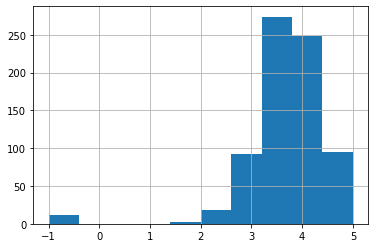

In [29]:
df.Rating.hist()

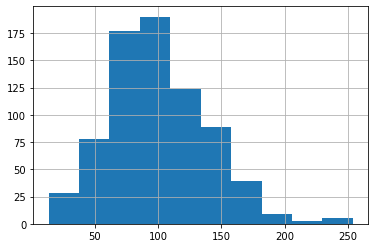

In [30]:
df.avg.hist()

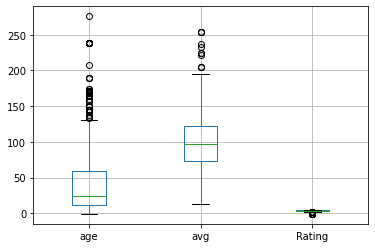

In [31]:
df.boxplot(column = ['age', 'avg', 'Rating'])

In [33]:
df[['age', 'avg', 'Rating', 'descr_len']].corr()

,age,avg,Rating,descr_len
age,1.000000,0.019655,0.021655,0.163911
avg,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
descr_len,0.163911,0.078808,-0.012281,1.000000


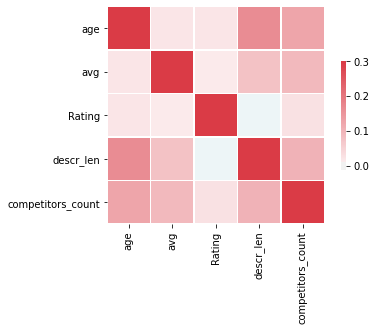

In [34]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg','Rating','descr_len','competitors_count']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'avg', 'company_txt',
       'State', 'same_state', 'age', 'Python', 'aws', 'Excel', 'Spark', 'R',
       'job_simp', 'Seniority', 'descr_len', 'competitors_count'],
      dtype='object')

In [39]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'State','same_state', 'Python', 'R',
       'Spark', 'aws', 'Excel', 'job_simp', 'Seniority']]

Graph for Size: total: 9


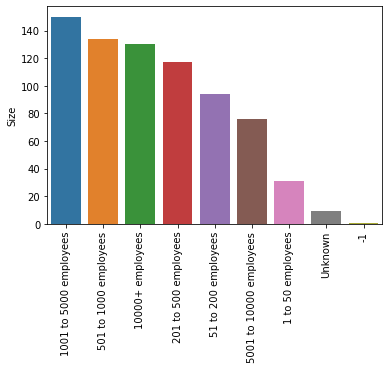

Graph for Type of ownership: total: 11


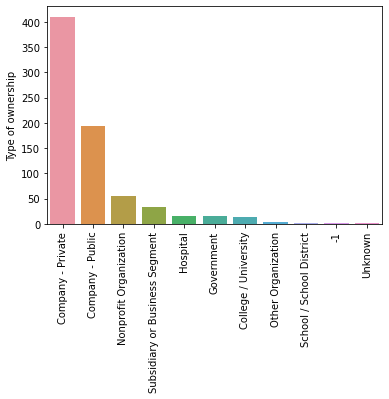

Graph for Sector: total: 25


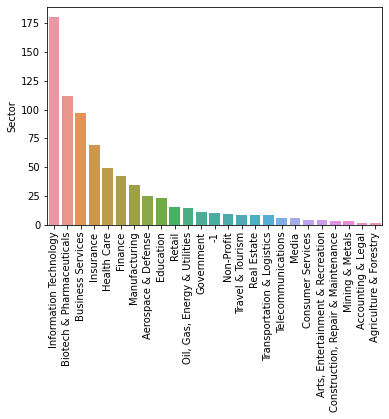

Graph for Revenue: total: 14


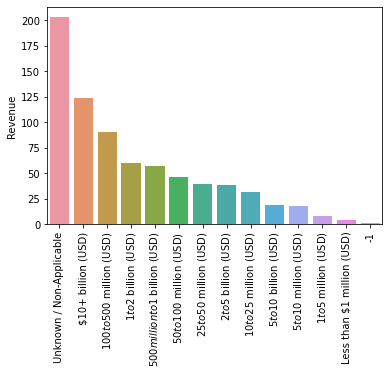

Graph for State: total: 38


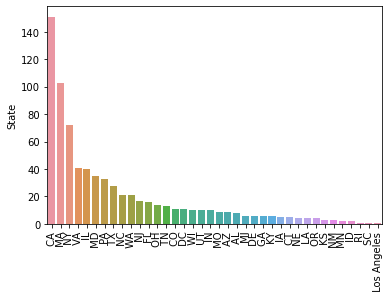

Graph for same_state: total: 2


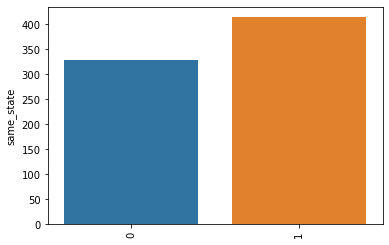

Graph for Python: total: 2


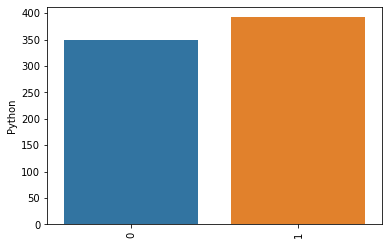

Graph for R: total: 2


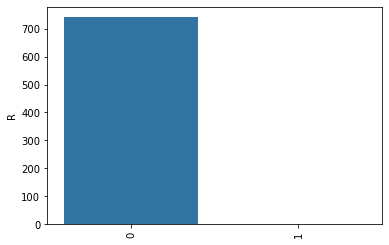

Graph for Spark: total: 2


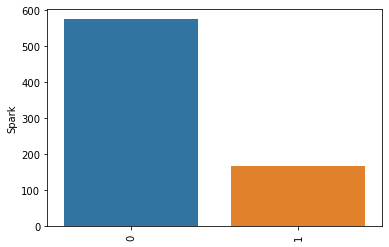

Graph for aws: total: 2


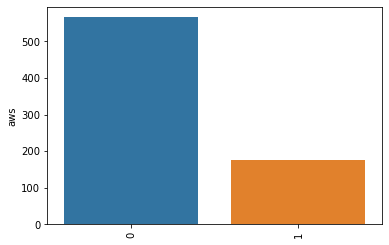

Graph for Excel: total: 2


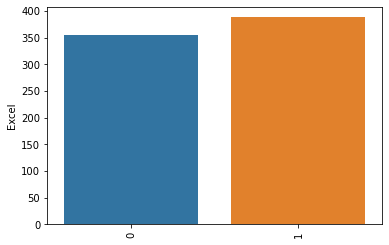

Graph for job_simp: total: 7


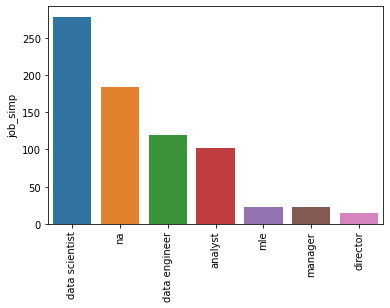

Graph for Seniority: total: 3


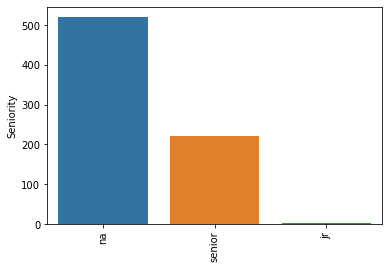

In [45]:
for i in df_cat[['Size','Type of ownership', 'Sector', 'Revenue', 'State','same_state', 'Python', 'R',
       'Spark', 'aws', 'Excel', 'job_simp', 'Seniority']].columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for {}: total: {}'.format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total: 20


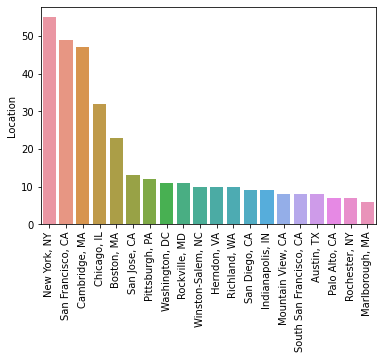

Graph for Headquarters: total: 20


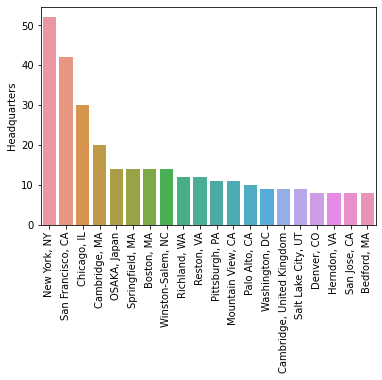

Graph for Industry: total: 20


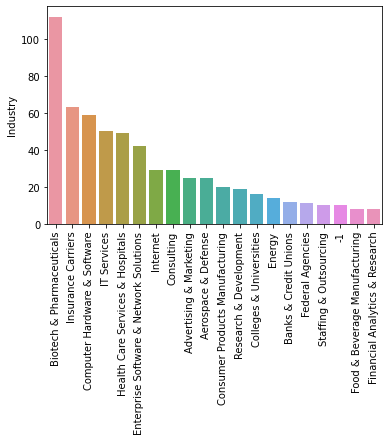

Graph for company_txt: total: 20


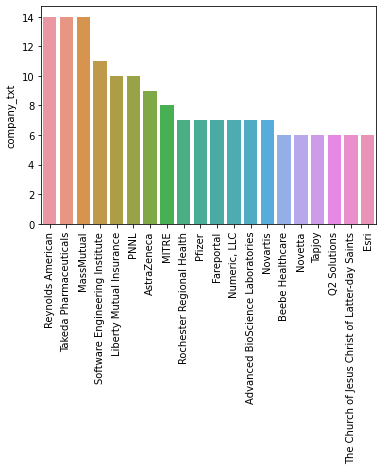

In [46]:
for i in df_cat[['Location', 'Headquarters', 'Industry', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for {}: total: {}'.format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [52]:
pd.pivot_table(df, index = ['job_simp', 'Seniority', ], values='avg')

avg
job_simp       Seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [57]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['State', 'job_simp'], values='avg', aggfunc='count').sort_values('State', ascending=False)

avg
State        job_simp           
 WI          na                4
             data scientist    3
             analyst           3
 WA          na                1
             data scientist   17
             analyst           3
 VA          na                5
             mle               2
             data scientist   18
             data engineer    10
             analyst           6
 UT          data engineer     3
             analyst           4
             data scientist    3
 TX          na                7
             data scientist   13
             data engineer     8
 TN          data scientist    1
             data engineer    10
             analyst           2
 SC          na                1
 RI          analyst           1
 PA          manager           3
             data engineer     1
             data scientist    6
             analyst           8
             mle               7
             na                8
 OR          data scientist    3
             data engineer     1
 OH          na                3
             data scientist    7
             analyst           4
 NY          na               12
             mle               2
             data scientist   40
             data engineer     4
             analyst          14
 NM          data scientist    3
 NJ          data scientist    4
             analyst           6
             data engineer     2
             manager           2
             director          2
             na                1
 NE          na                4
 NC          na               12
             data scientist    3
             data engineer     6
 MO          na                3
             manager           1
             data scientist    3
             analyst           2
 MN          data engineer     1
             analyst           1
 MI          data scientist    4
             manager           2
 MD          na               16
             data scientist   13
             data engineer     3
             analyst           3
 MA          na               46
             manager           5
             director          6
             data scientist   30
             data engineer    12
             analyst           4
 Los Angeles data scientist    1
 LA          analyst           1
             data engineer     2
             na                1
 KY          na                4
             data scientist    2
 KS          mle               3
 IN          na                4
             data scientist    2
             data engineer     4
 IL          analyst           3
             na                6
             mle               2
             director          6
             data scientist   15
             data engineer     8
 ID          analyst           2
 IA          analyst           2
             data engineer     3
 GA          data scientist    3
             na                3
 FL          data scientist    7
             data engineer     3
             analyst           6
 DE          na                6
 DC          data scientist    5
             data engineer     4
             analyst           2
 CT          na                3
             data scientist    2
 CO          mle               1
             data engineer     3
             analyst           1
             na                3
             data scientist    3
 CA          na               27
             mle               5
             manager           9
             data scientist   67
             data engineer    25
             analyst          18
 AZ          data scientist    1
             data engineer     5
             analyst           1
             na                2
 AL          na                2
             data engineer     1
             analyst           5

In [59]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'State', values = 'avg').sort_values('avg', ascending = False)

,avg
State,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'provided', 'min_salary', 'max_salary', 'avg', 'company_txt',
       'State', 'same_state', 'age', 'Python', 'aws', 'Excel', 'Spark', 'R',
       'job_simp', 'Seniority', 'descr_len', 'competitors_count'],
      dtype='object')